# Module 9 Exercises

In this exercise, you will **analyze networks and visualize the results**. 


Let's start with analyzing the **traffic between airports**.

In [32]:
library(dplyr)
library(sp)
library(geosphere)
library(igraph)
library(networkD3)

# flight destinations and counts 
flights <- read.csv("./data/flights.csv", as.is=TRUE, header=TRUE)

**Exercise 1:** **Create a data frame** that only has `airport1`, `airport2`, and the `cnt` attributes.

In [22]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
new_data <- flights %>% 
  select(airport1, airport2, cnt)
head(new_data)


,airport1,airport2,cnt
,<chr>,<chr>,<int>
1,DFW,SJU,120
2,MSP,DFW,326
3,LGA,ORD,860
4,TPA,JFK,56
5,STT,BOS,44
6,PHX,DFW,550


**Exercise 2:** **Create a graph from this data frame**, use directed=FALSE to make it an **undirected** graph. 

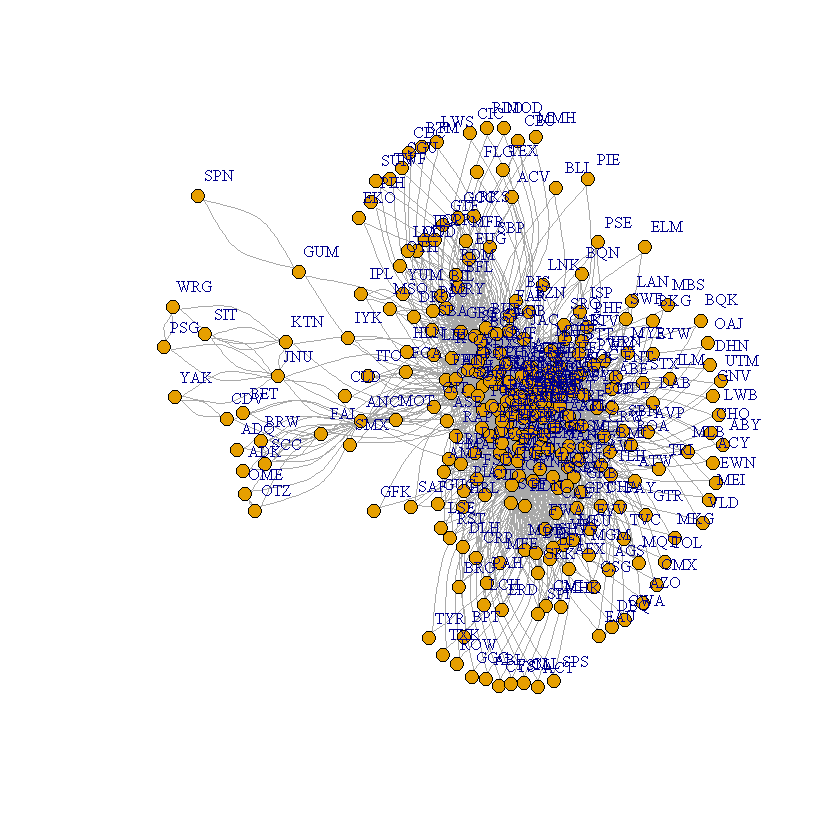

In [23]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
graph <- graph_from_data_frame(new_data, directed = FALSE)

plot(graph, 
     edge.arrow.size = 0.5, 
     vertex.label.dist = 1.5,
     vertex.size = 5,
     vertex.label.cex = 0.8)

**Exercise 3:** Plot the network with igraph's `plot` function with a **force-directed layout**. 

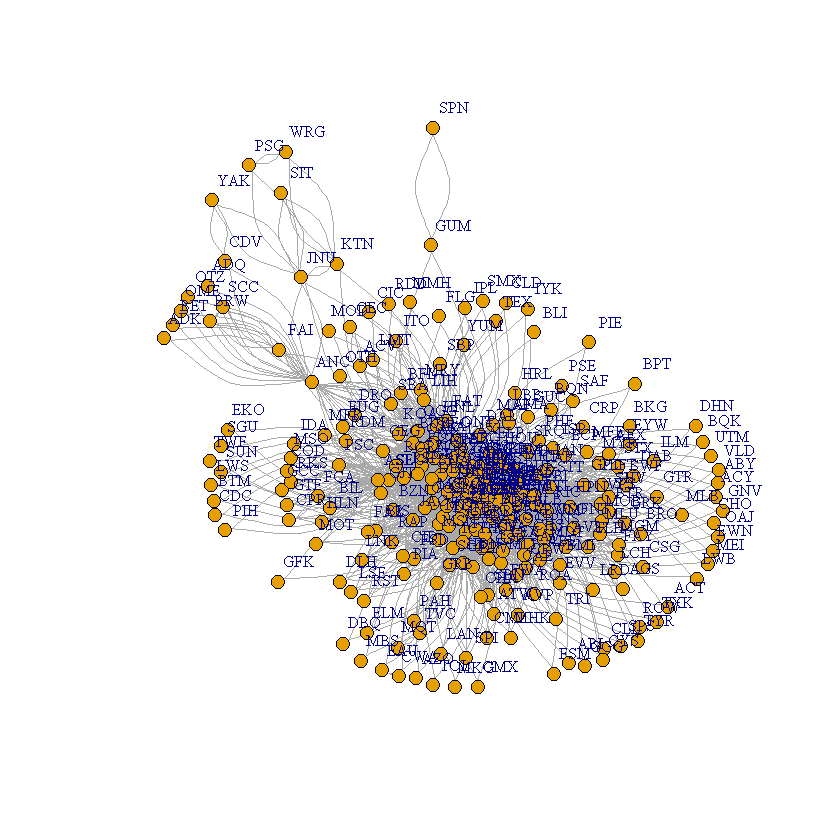

In [24]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
graph <- graph_from_data_frame(new_data, directed = FALSE)

# Compute the force-directed layout
layout <- layout_with_fr(graph)

# Plot the network using force-directed layout
plot(graph, layout = layout, 
     edge.arrow.size = 0.5, 
     vertex.label.dist = 1.5,
     vertex.size = 5,
     vertex.label.cex = 0.8)

Now, we will **reduce multiple edges** between vertices by adding all their attributes. There are multiple airlines operating between two airports, **we add their flight counts.**

In [25]:
# add the flight counts by using "sum"
gs <- simplify(graph, edge.attr.comb="sum")

# NORMALIZE the edge weight 
E(gs)$cnt <- E(gs)$cnt/max(E(gs)$cnt)

**Exercise 4:** Plot again, this time, **assign the edge weights to `edge.width` parameter.**

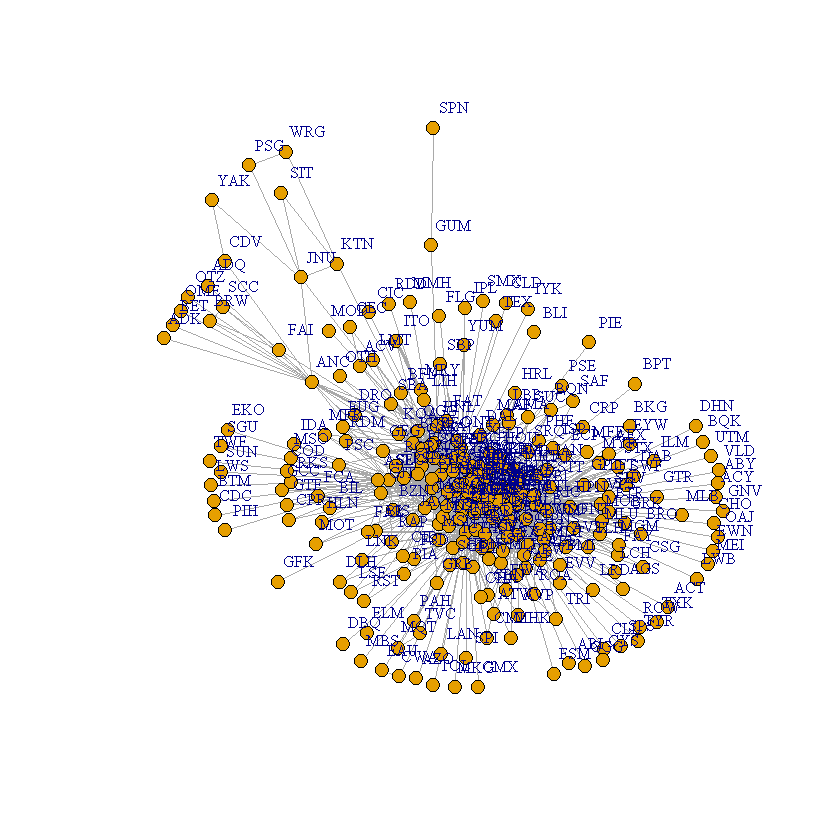

In [26]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
plot(gs, layout = layout, 
     edge.width = E(gs)$cnt * 5, 
     edge.arrow.size = 0.5, 
     vertex.label.dist = 1.5,
     vertex.size = 5,
     vertex.label.cex = 0.8)


Now we can see the traffic weighted by the flight counts. Let's change the **size of the vertices by using the traffic**. 


We need to **sum up the weights of all the edges for each vertex**.

In [27]:
# Summing up the edge weights of the adjacent edges for each vertex.
V(gs)$traffic <- strength(gs, mode="all", weights = E(gs)$cnt)

# normalize
V(gs)$traffic <- V(gs)$traffic/max(V(gs)$traffic)

**Exercise 5:** Plot again, this time, **assign the `V(gs)$traffic` to the `vertex.size`. Make sure to multiply it by a value to make the graph look nice.** 

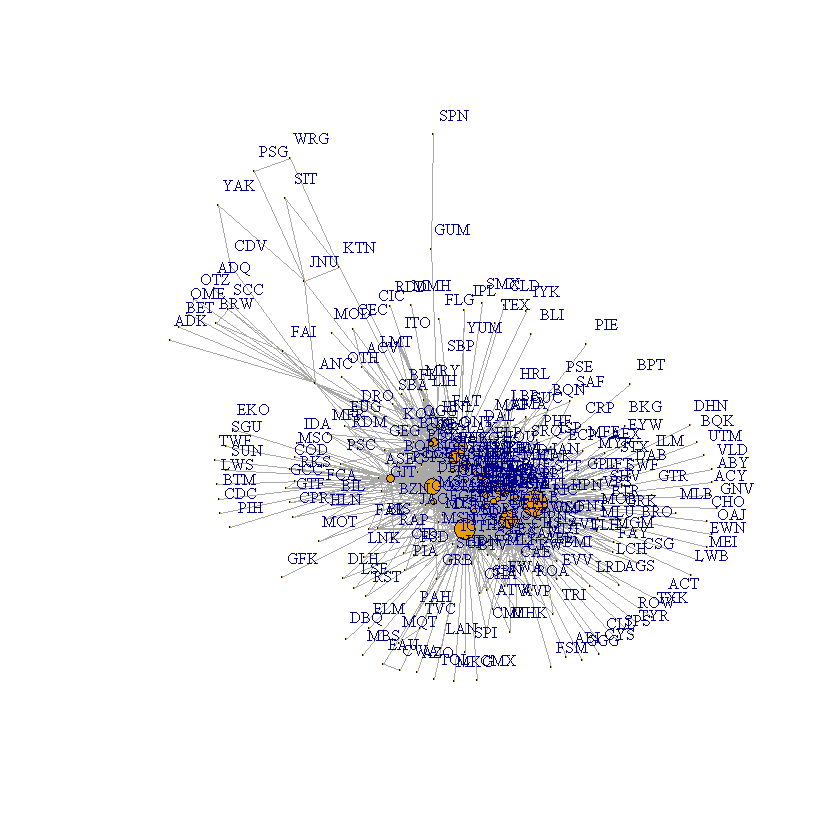

In [28]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
scaling_factor <- 10
plot(gs, layout = layout, 
     edge.width = E(gs)$cnt * 5,  
     edge.arrow.size = 0.5, 
     vertex.size = V(gs)$traffic * scaling_factor,  
     vertex.label.dist = 1.5,
     vertex.label.cex = 0.8)

Now we can see that some airports are busier than others, but we don't know their **names**. Let's find out by **removing the vertex shape** and **leaving the vertex label** and use a **font size proportional to the traffic**.


**Exercise 6:** Plot again, this time: `vertex.shape="none"` and `vertex.label.cex` should be **proportional to traffic.**

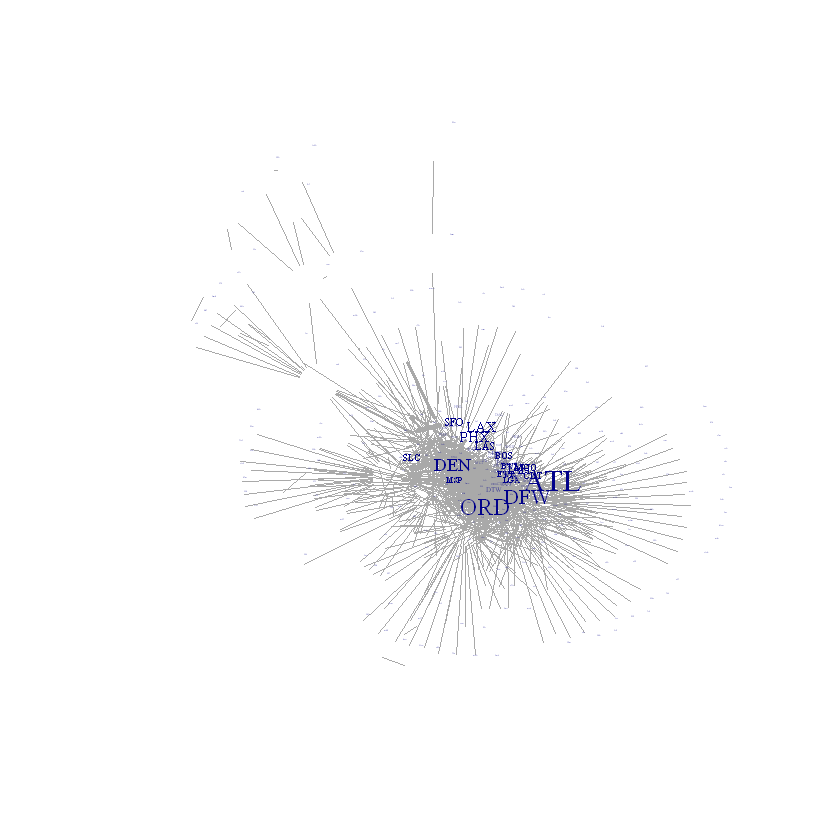

In [29]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
max_traffic <- max(V(gs)$traffic)
relative_sizes <- V(gs)$traffic / max_traffic


plot(gs, layout = layout, 
     edge.width = E(gs)$cnt * 5,  
     edge.arrow.size = 0.5, 
     vertex.shape = "none",  
     vertex.label.dist = 1.5,
     vertex.label.cex = relative_sizes * 1.5)


Let's **get rid of vertices** that do not have much traffic.

In [30]:
# find them 
dv <- V(gs)$traffic < 0.3

#delete them 
gs <- delete_vertices(gs, V(gs)[dv])

**Exercise 7:** Plot again, this time use a **vertex size and label font proportional to traffic** and make sure to make it look nice. 

Warning message in layout[, 1] + label.dist * cos(-label.degree) * (vertex.size + :
"longer object length is not a multiple of shorter object length"
Warning message in layout[, 2] + label.dist * sin(-label.degree) * (vertex.size + :
"longer object length is not a multiple of shorter object length"


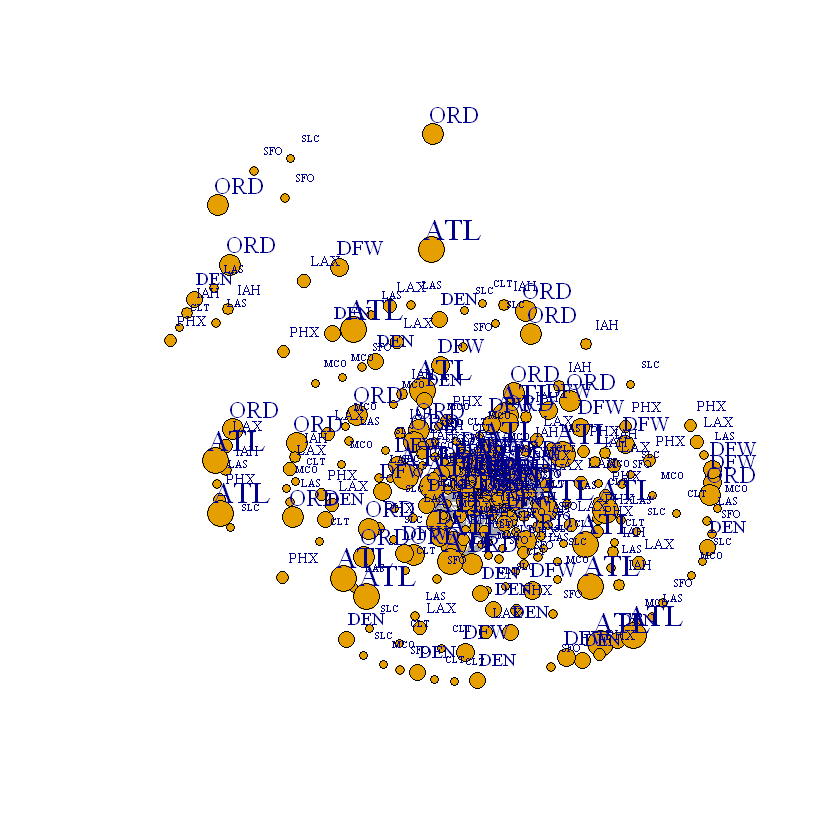

In [31]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
scaling_factor <- 10

# Calculate relative vertex sizes based on traffic attribute
max_traffic <- max(V(gs)$traffic)
relative_sizes <- V(gs)$traffic / max_traffic

plot(gs, layout = layout, 
     edge.width = E(gs)$cnt * 5,  
     edge.arrow.size = 0.5, 
     vertex.label.dist = 1.5,
     vertex.label.cex = relative_sizes * 1.5,  
     vertex.size = relative_sizes * scaling_factor)


### Please save your notebook: File -> Save Notebook (Ctrl+S) 

#### **Use the file name format as follows:**

m9_Exercise_R_(_Your #700 number including '700'_).ipynb, **e.g., m9_Exercise_R_700729831.ipynb**.